In [107]:
import numpy as np
import pandas as pd

In [108]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [109]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [110]:
df.dropna(inplace=True)

In [111]:
df.shape

(714, 3)

In [112]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [113]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [115]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [116]:
clf=DecisionTreeClassifier()

In [117]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [118]:
accuracy_score(y_test,y_pred)

0.6433566433566433

In [119]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6288928012519561

In [120]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [121]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [122]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [123]:
trf.named_transformers_['first'].n_bins_

array([15])

In [124]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [125]:
output=pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [126]:
output['age_labels']=pd.cut(x=X_train['Age'],
                            bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=X_train['Fare'],
                            bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [127]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
110,47.0,13.0,52.0000,12.0,"(42.0, 47.0]","(51.479, 76.292]"
341,24.0,5.0,263.0000,14.0,"(23.0, 25.0]","(108.9, 512.329]"
808,39.0,11.0,13.0000,6.0,"(38.0, 42.0]","(10.5, 13.0]"
866,27.0,6.0,13.8583,6.0,"(25.0, 28.0]","(13.0, 14.454]"
265,36.0,10.0,10.5000,5.0,"(35.0, 38.0]","(8.158, 10.5]"


In [128]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2=clf.predict(X_test_trf)

In [129]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [130]:
X_trf=trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6275234741784037

In [131]:
def discretize(X,y,bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("After")

    plt.show()

0.634546165884194


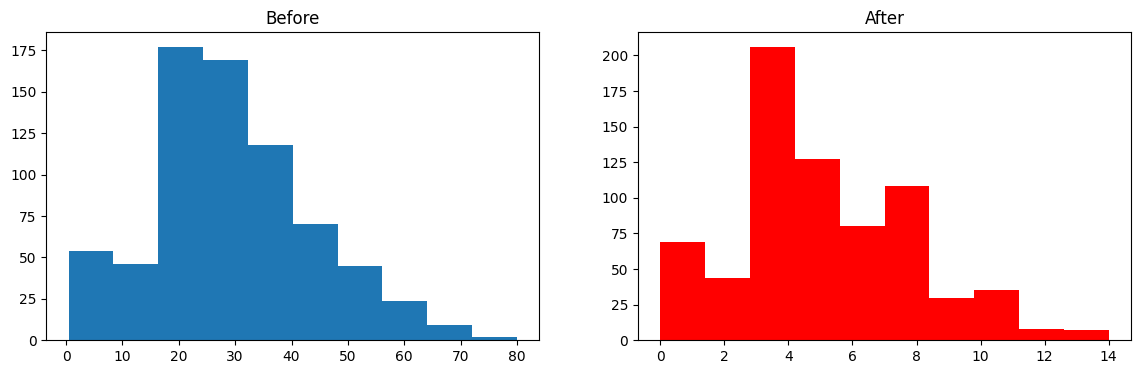

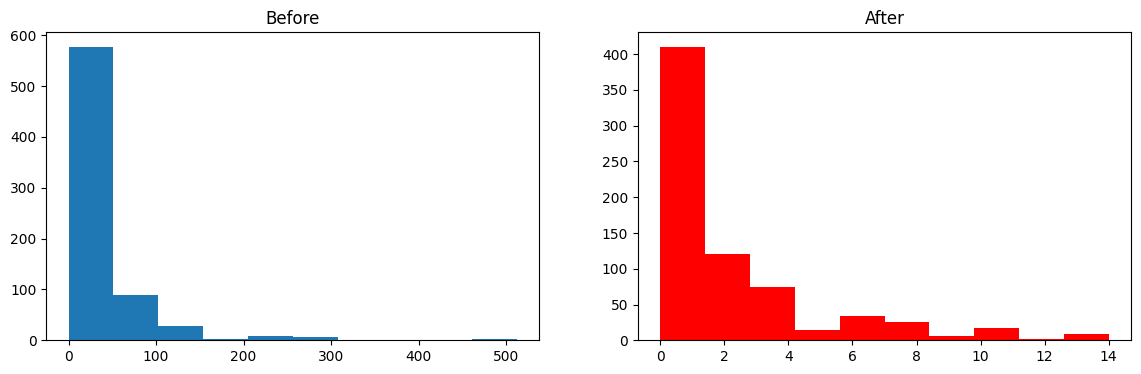

In [132]:
discretize(X,y,15,'kmeans')

## BINARIZATION

In [133]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','SibSp','Parch','Survived'])

In [134]:
df.dropna(inplace=True)

In [135]:
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [136]:
df['Family']=df['SibSp']+df['Parch']

In [137]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0


In [138]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [139]:
df.head()

,Survived,Age,Fare,Family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [140]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [141]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [142]:
X_train.head()

,Age,Fare,Family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [143]:
# without binarization
clf=DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6083916083916084

In [144]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6428990610328638

In [145]:
# Applying binarization
from sklearn.preprocessing import Binarizer

In [146]:
trf=ColumnTransformer([
    ('bin',Binarizer(copy=False),['Family'])
],remainder='passthrough')

In [147]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [148]:
pd.DataFrame(X_train_trf,columns=['Family','Age','Fare'])

,Family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [149]:
# without binarization
clf=DecisionTreeClassifier()

clf.fit(X_train_trf,y_train)

y_pred2=clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6153846153846154

In [150]:
X_trf=trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6303990610328638